# Modeling - Decision Tree



What is it?
- a machine learning algorithm used for predicting categorical target variables
- Pipeline: Plan - Acquire - Prepare - Explore - **Model** - Deliver

Why do we care?
- we can predict future target variables based on the model we build! 

How does it work?
- [slides we already saw](https://docs.google.com/presentation/d/12Sl-6X5hVJPXGel0-cMeWVI_iw4DDWQiXXrvU_o17gY/edit?usp=sharing)

How do we use it?
- acquire, prepare, explore our data
- split data for modeling
- build models on train
    - create rules based on our input data
- evaluate models on train and validate
    - see how our rules work on unseen data
- pick best of the best model, and evaluate bestest model on test

## Show us!

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import acquire
import prepare

## Example - simple

#### SKLEARN Modeling Process
0. split into features and target variable
1. make the object
2. fit the object
3. transform the object

In [22]:
# Example data from the lesson
df = pd.read_csv(
    StringIO('''
Yes,Yes,7,No
Yes,No,12,No
No,Yes,18,Yes
No,Yes,35,Yes
Yes,Yes,38,Yes
Yes,No,50,No
No,No,83,No
        '''), 
    names=['loves_cats','loves_dogs','age', 'loves_nicholas_cage'])

In [23]:
#look at the data
df

,loves_cats,loves_dogs,age,loves_nicholas_cage
0,Yes,Yes,7,No
1,Yes,No,12,No
2,No,Yes,18,Yes
3,No,Yes,35,Yes
4,Yes,Yes,38,Yes
5,Yes,No,50,No
6,No,No,83,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   loves_cats           7 non-null      object
 1   loves_dogs           7 non-null      object
 2   age                  7 non-null      int64 
 3   loves_nicholas_cage  7 non-null      object
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


#### 0. split into features and target variable
- X our features
- y target variable

In [27]:
#lets just use age MUST BE A DATAFRAME
x=df[['age']]
x

,age
0,7
1,12
2,18
3,35
4,38
5,50
6,83


In [30]:
#isolate target variable #must be a series
y=df.loves_nicholas_cage
y

0     No
1     No
2    Yes
3    Yes
4    Yes
5     No
6     No
Name: loves_nicholas_cage, dtype: object

Note: our X is a dataframe with our feature and Y is a series with our target variable

#### 1. make the object

- the object we are making is our decision tree 
- none of our data is input during this phase
- this is initializing the algorithm

In [33]:
#import! 
from sklearn.tree import DecisionTreeClassifier

In [36]:
#make it!
clf= DecisionTreeClassifier()
clf

DecisionTreeClassifier()

#### 2. fit the object

- now we fit our decision tree object to our features and target variable
- we do not need to save over our variable, it has been altered
- this is creating our model

In [37]:
# fit it!
clf.fit(x,y)

DecisionTreeClassifier()

#### 3. transform the object
- there are different ways to transform the object
- `.score` will return us the accuracy of our model

In [38]:
#transform it!
clf.score(x,y)

1.0

## Example - Iris Dataset

See it in the data science pipeline!

### Acquire

In [48]:
#get my iris data
df=acquire.get_iris_data()

In [41]:
#look at it
df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


### Prepare

In [49]:
#clean my data
df=prepare.prep_iris(df)


In [67]:
#split my data
train,test,validate=prepare.split_data(df,'species')

In [54]:
#look at my train
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
70,versicolor,5.9,3.2,4.8,1.8,0,1,0
123,virginica,6.3,2.7,4.9,1.8,0,0,1
87,versicolor,6.3,2.3,4.4,1.3,0,1,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
15,setosa,5.7,4.4,1.5,0.4,1,0,0


### Explore

completed the following steps on my features and target variable
1. Hypothesize
2. visualize
3. analyze
4. summarize

these steps arent written out here, however, i found that petal width and petal length identified species the most

### Model

Before we put anything into our machine learning model, we will want to establish a baseline predication

#### Baseline

In [55]:
#find most common species
train.species.value_counts()

versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64

Since there is not a most common class, it doesn't matter which one we choose.  

In [58]:
#calculate baseline accuracy
baseline_accuracy=30/(30+30+30)
baseline_accuracy*100

33.33333333333333

#### 0. split into features and target variable
- need to do this on my train, validate, and test dataframe
- will end up with the following variables:
    - X_train, X_validate, X_test: all the features we plan to put into our model
    - y_train, y_validate, y_test: the targete variable

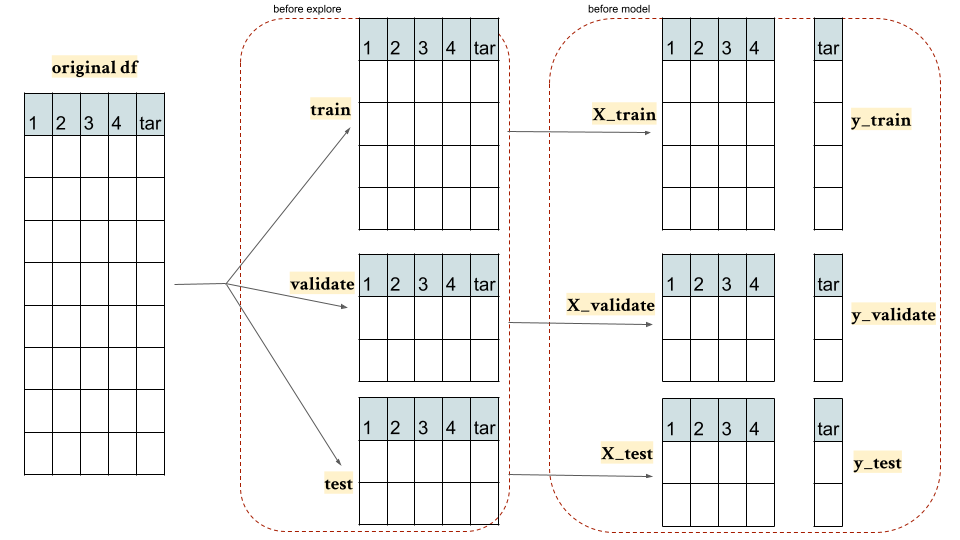

In [59]:
#look at train
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
70,versicolor,5.9,3.2,4.8,1.8,0,1,0
123,virginica,6.3,2.7,4.9,1.8,0,0,1
87,versicolor,6.3,2.3,4.4,1.3,0,1,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
15,setosa,5.7,4.4,1.5,0.4,1,0,0


For my first iteration, im going to send all possible features into my model

In [68]:
#set all my features as my X_train
x_train=train[['sepal_length','sepal_width','petal_length','petal_width']]
x_validate=validate[['sepal_length','sepal_width','petal_length','petal_width']]
x_test=test[['sepal_length','sepal_width','petal_length','petal_width']]

In [542]:
#repeat for validate and test


In [69]:
#set target
y_train=train.species
y_validate=validate.species
y_test=test.species

In [544]:
#notice im sending in a single column name


In [545]:
#repeat for validate and test


Note: our X variables are dataframes, our y variables are series

#### 1. make the object

In [70]:
clf= DecisionTreeClassifier()
clf

DecisionTreeClassifier()

#### 2. fit the object

In [71]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

#### 3. transform the object

In [72]:
clf.score(x_train,y_train)

1.0

In [73]:
from sklearn.tree import plot_tree

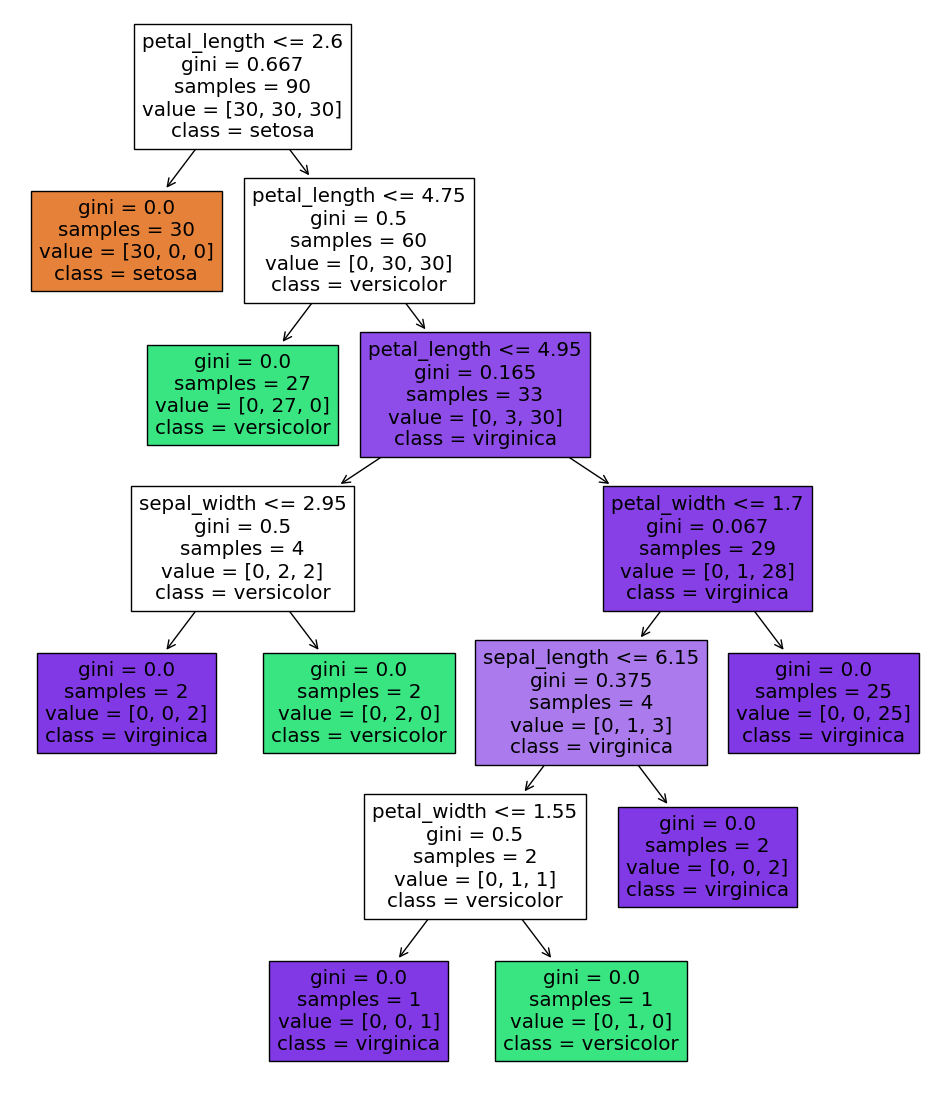

In [80]:
#see the tree that was built
#plot_tree
plt.figure(figsize=(12,14))
plot_tree(clf, feature_names=x_train.columns,
         class_names=clf.classes_, filled=True)
plt.show()

#### how does our model work on unseen data?

In [81]:
#score on validate
clf.score(x_validate,y_validate)

0.8333333333333334

Takeaway:  Our accuracy dropped. Our model might be overfitting on our training data.

The deeper our tree the more questions we ask, the more focused our model will be on only our training data. This makes it prone to overfitting.

Always compare the train and validate evaluation metrics to see if it is overfitting.

## More Modeling

We've only built one model so far. Let's build more models to find the best one!

Ways to build different models
- change hyperparameters
- change feature sets

### change a hyperparameter

decision tree hyperparameters
- max_depth: maximum number of splits (default: None)
- min_samples_split: minimum number of data points required to split a node (default: 2)
- min_samples_leaf: minimum number of data points required to be present in a endpoint or leaf (default: 1)
- max_leaf_nodes: maximum number of "endpoints", or leaves (default: None)
- criterion: how our impurity values are calculated (default:gini)

#### 1. create the object

this is when you set your hyperparameter

In [83]:
#set max depth
tree1=DecisionTreeClassifier(max_depth=3)

#### 2. fit the object

In [85]:
#still using train data
tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

#### 3. transform the object

In [86]:
#evaluate on train
tree1.score(x_train,y_train)

0.9666666666666667

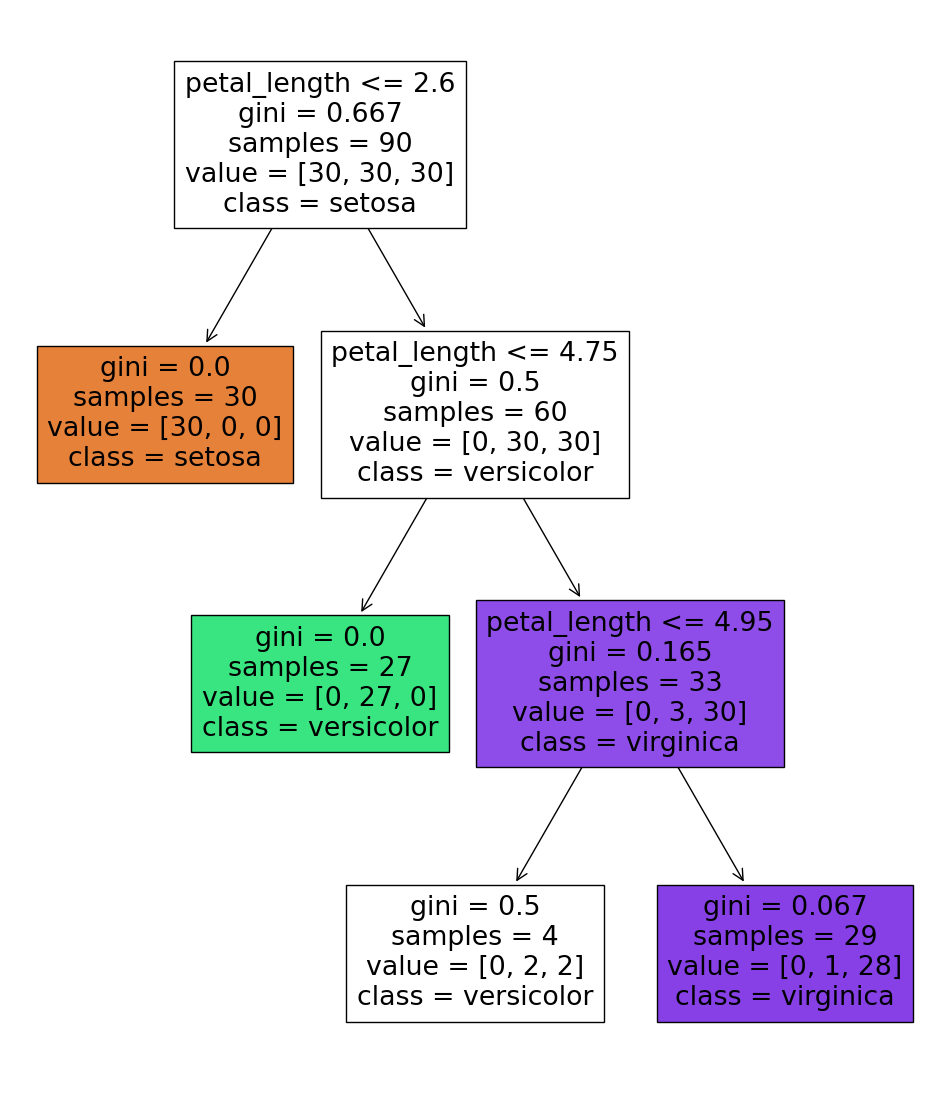

In [87]:
#see the tree that was built
plt.figure(figsize=(12,14))
plot_tree(tree1, feature_names=x_train.columns,
         class_names=tree1.classes_, filled=True)
plt.show()

In [89]:
#see predictions
tree1.predict(x_train)

array(['versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [94]:
#see probability of predictions 
tree1.predict_proba(x_train)[:5]

array([[0. , 0.5, 0.5],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

#### more evaluation

In [95]:
#import 
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
confusion_matrix?

In [97]:
#y_true 
y_train.head()

70     versicolor
123     virginica
87     versicolor
3          setosa
15         setosa
Name: species, dtype: object

In [98]:
#y_pred
y_pred=tree1.predict(x_train)

In [99]:
#generate confusion matrix!
confusion_matrix(y_train,y_pred)

array([[30,  0,  0],
       [ 0, 29,  1],
       [ 0,  2, 28]])

In [102]:
#find labels in our dataset & sort
labels=sorted(y_train.unique())

In [106]:
#make pretty with df
pd.DataFrame(confusion_matrix(y_train,y_pred),
            index=[label + '_actual' for label in labels],
            columns=[label + '_predict' for label in labels])

,setosa_predict,versicolor_predict,virginica_predict
setosa_actual,30,0,0
versicolor_actual,0,29,1
virginica_actual,0,2,28


In [107]:
#generate classification report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
  versicolor       0.94      0.97      0.95        30
   virginica       0.97      0.93      0.95        30

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



#### evaluate on unseen data

In [108]:
#score our validate
tree1.score(x_validate,y_validate)

0.9

### change another hyperparameter

In [111]:
#create using max_leaf_nodes
tree2=DecisionTreeClassifier(max_leaf_nodes=2)
#fit
tree2.fit(x_train,y_train)
#transform2
tree2.score(x_train,y_train)

0.6666666666666666

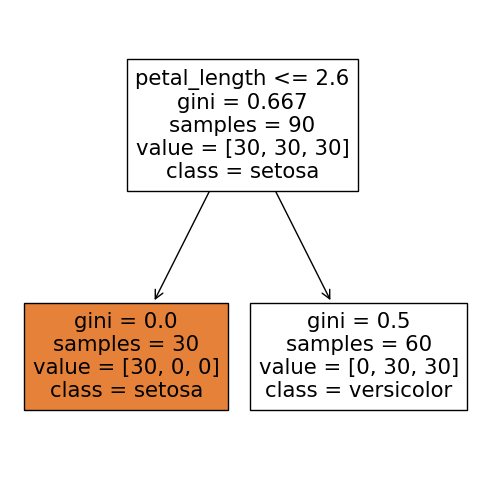

In [115]:
#plot the tree!
plt.figure(figsize=(6,6))
plot_tree(tree2, feature_names=x_train.columns,
         class_names=tree2.classes_, filled=True)
plt.show()

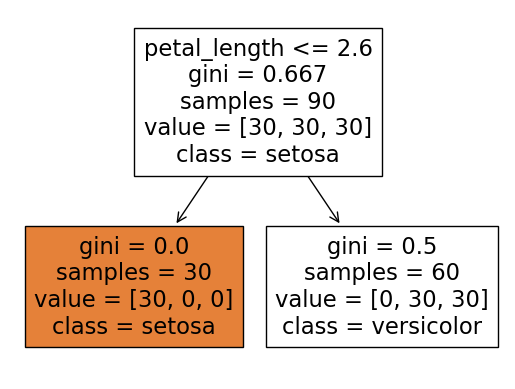

In [118]:
#evaluate on validate
tree2.score(x_validate,y_validate)
plot_tree(tree2, feature_names=x_validate.columns,
         class_names=tree2.classes_, filled=True)
plt.show()

Reminders: 

Takeaway: There is no overfitting, However, there is pretty bad score compared to other models.

### change features

In [119]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
70,versicolor,5.9,3.2,4.8,1.8,0,1,0
123,virginica,6.3,2.7,4.9,1.8,0,0,1
87,versicolor,6.3,2.3,4.4,1.3,0,1,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
15,setosa,5.7,4.4,1.5,0.4,1,0,0


In [120]:
#set features i found in exploration
features=['petal_length','petal_width']

In [121]:
#see em on X_train
x_train[features]

,petal_length,petal_width
70,4.8,1.8
123,4.9,1.8
87,4.4,1.3
3,1.5,0.2
15,1.5,0.4
...,...,...
11,1.6,0.2
29,1.6,0.2
96,4.2,1.3
44,1.9,0.4


#### try another model! with my selected features

In [133]:
#create
tree3=DecisionTreeClassifier()

#fit 
#with features
tree3.fit(x_train[features],y_train)

#transform 
tree3.score(x_train[features],y_train)
#with features


0.9888888888888889

In [132]:
#evaluate on validate 
#with features
tree3.score(x_validate[features],y_validate)


0.9333333333333333

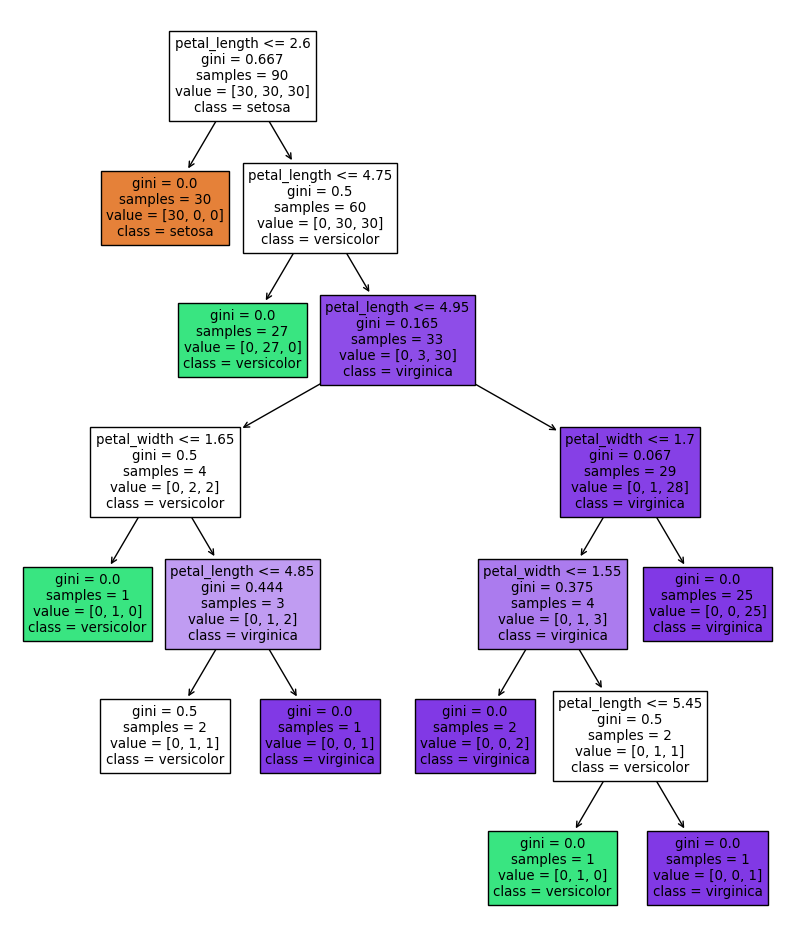

In [135]:
plt.figure(figsize=(10,12))
plot_tree(tree3, feature_names=x_train[features].columns,
         class_names=tree3.classes_, filled=True)
plt.show()

Takeaway: This one has the least amount of overfitting, and performs much better than my 67% model.

## Finish Modeling

# use your test data ONLY ON ONE MODEL, your final bestest model

Pick best model: 
Pick three3 model, since it has least overfitting and one of the highest overal scores.

No hyperparameters, but features were are petal length and petal width.

In [136]:
#evaluate on test
tree3.score(x_test[features],y_test)

0.9666666666666667

Conclude: 



On completely unseen data, my model perfotms at %97 accuracy, for predicing the species of an iris flower.

Beats the baseline of 33%

# Reminders

Process recap:
 - Build yor model on train data, only train data!!
   - fit
- evaluate your model on train
  - transform function
- evaluate your model on validate
   - transform function

Evaluate:
